# DeepCropMapping 数据分析

## 项目概述
本notebook用于分析和预处理DeepCropMapping项目的卫星遥感数据，包括：
- 数据维度检查和对齐
- 数据质量分析
- 可视化分析
- 数据预处理

## 数据说明
- **X数据**: 多光谱遥感数据 (H, W, T, C)
- **Y数据**: 农作物分类标签 (H, W)
- **类别**: 9种农作物类型（玉米、小麦、向日葵等）

In [13]:
# 导入必要的库
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 确保当前工作目录正确
current_dir = Path.cwd()
print(f"当前工作目录: {current_dir}")

# 如果不在正确的目录，切换到notebook所在目录
notebook_dir = Path(__file__).parent if '__file__' in globals() else Path.cwd()
if notebook_dir.name != 'deepcropmapping':
    # 如果在其他目录，尝试找到deepcropmapping目录
    for parent in [Path.cwd()] + list(Path.cwd().parents):
        deepcrop_dir = parent / 'deepcropmapping'
        if deepcrop_dir.exists():
            os.chdir(deepcrop_dir)
            print(f"切换到工作目录: {deepcrop_dir}")
            break

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Hiragino Sans GB', 'Microsoft YaHei', 'SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [12, 8]

print("Libraries imported successfully!")

当前工作目录: /Users/ff_crazy/ myProj/DeepCropMapping/deepcropmapping
Libraries imported successfully!


In [14]:
# 导入项目模块
import sys
from pathlib import Path

# 添加项目根目录到Python路径
current_dir = Path.cwd()
if current_dir.name == 'deepcropmapping':
    # 在deepcropmapping目录内，需要添加父目录
    project_root = current_dir.parent
    sys.path.insert(0, str(project_root))
    
    from deepcropmapping.pre_process.dimension_checker import check_data_dimensions, align_data_dimensions
    from deepcropmapping.visual.data_visualization import CropDataVisualizer
else:
    # 在项目根目录，直接导入
    from deepcropmapping.pre_process.dimension_checker import check_data_dimensions, align_data_dimensions
    from deepcropmapping.visual.data_visualization import CropDataVisualizer

print("✅ Project modules imported successfully!")

✅ Project modules imported successfully!


## 1. 数据维度检查

首先检查数据集的维度是否匹配，这对于后续的模型训练非常重要。

In [15]:
# 检查数据维度
print("=" * 60)
print("数据维度检查")
print("=" * 60)

dimension_result = check_data_dimensions(verbose=True)

print("\n检查结果详情:")
print(f"维度匹配: {'✅ 是' if dimension_result['match'] else '❌ 否'}")
print(f"X数据形状: {dimension_result['x_shape']}")
print(f"Y数据形状: {dimension_result['y_shape']}")
print(f"X数据类型: {dimension_result['x_dtype']}")
print(f"Y数据类型: {dimension_result['y_dtype']}")

if not dimension_result['match']:
    print(f"\n维度差异: {dimension_result.get('differences', 'N/A')}")
    print(f"推荐解决方案: {dimension_result.get('recommendations', [])}")

数据维度检查
Loading data for dimension check...
X data shape: (326, 1025, 28, 8)
Y data shape: (326, 1025)
X data dtype: uint16
Y data dtype: uint8

X spatial dimensions: (326, 1025)
Y spatial dimensions: (326, 1025)

✅ 空间维度匹配!

检查结果详情:
维度匹配: ✅ 是
X数据形状: (326, 1025, 28, 8)
Y数据形状: (326, 1025)
X数据类型: uint16
Y数据类型: uint8


## 2. 数据概览和统计

使用可视化工具获取数据的基本统计信息。

In [16]:
# 初始化数据可视化器
print("初始化数据可视化器...")
visualizer = CropDataVisualizer()

# 显示数据概览
visualizer.data_overview()

初始化数据可视化器...
Loading dataset...
Error loading data: Data files not found in /Users/ff_crazy/ myProj/DeepCropMapping/deepcropmapping/dataset


FileNotFoundError: Data files not found in /Users/ff_crazy/ myProj/DeepCropMapping/deepcropmapping/dataset

## 3. 数据质量分析

分析数据的质量，包括缺失值、异常值等。

In [17]:
# 数据质量分析
print("=" * 60)
print("数据质量分析")
print("=" * 60)

x_data = visualizer.x_data
y_data = visualizer.y_data

# 检查缺失值和异常值
x_nan_count = np.isnan(x_data).sum() if x_data.dtype.kind == 'f' else 0
y_nan_count = np.isnan(y_data).sum() if y_data.dtype.kind == 'f' else 0

print(f"X数据缺失值数量: {x_nan_count}")
print(f"Y数据缺失值数量: {y_nan_count}")

# 检查数据范围
print(f"\nX数据统计:")
print(f"  最小值: {x_data.min()}")
print(f"  最大值: {x_data.max()}")
print(f"  均值: {x_data.mean():.2f}")
print(f"  标准差: {x_data.std():.2f}")

print(f"\nY数据统计:")
unique_labels = np.unique(y_data)
print(f"  唯一标签: {unique_labels}")
print(f"  标签数量: {len(unique_labels)}")
print(f"  最小标签: {y_data.min()}")
print(f"  最大标签: {y_data.max()}")

数据质量分析


NameError: name 'visualizer' is not defined

## 4. 可视化分析

使用多种方式可视化数据分布和特征。

In [18]:
# 类别分布可视化
print("生成类别分布图...")
visualizer.plot_class_distribution()
plt.show()

生成类别分布图...


NameError: name 'visualizer' is not defined

生成空间分布图...


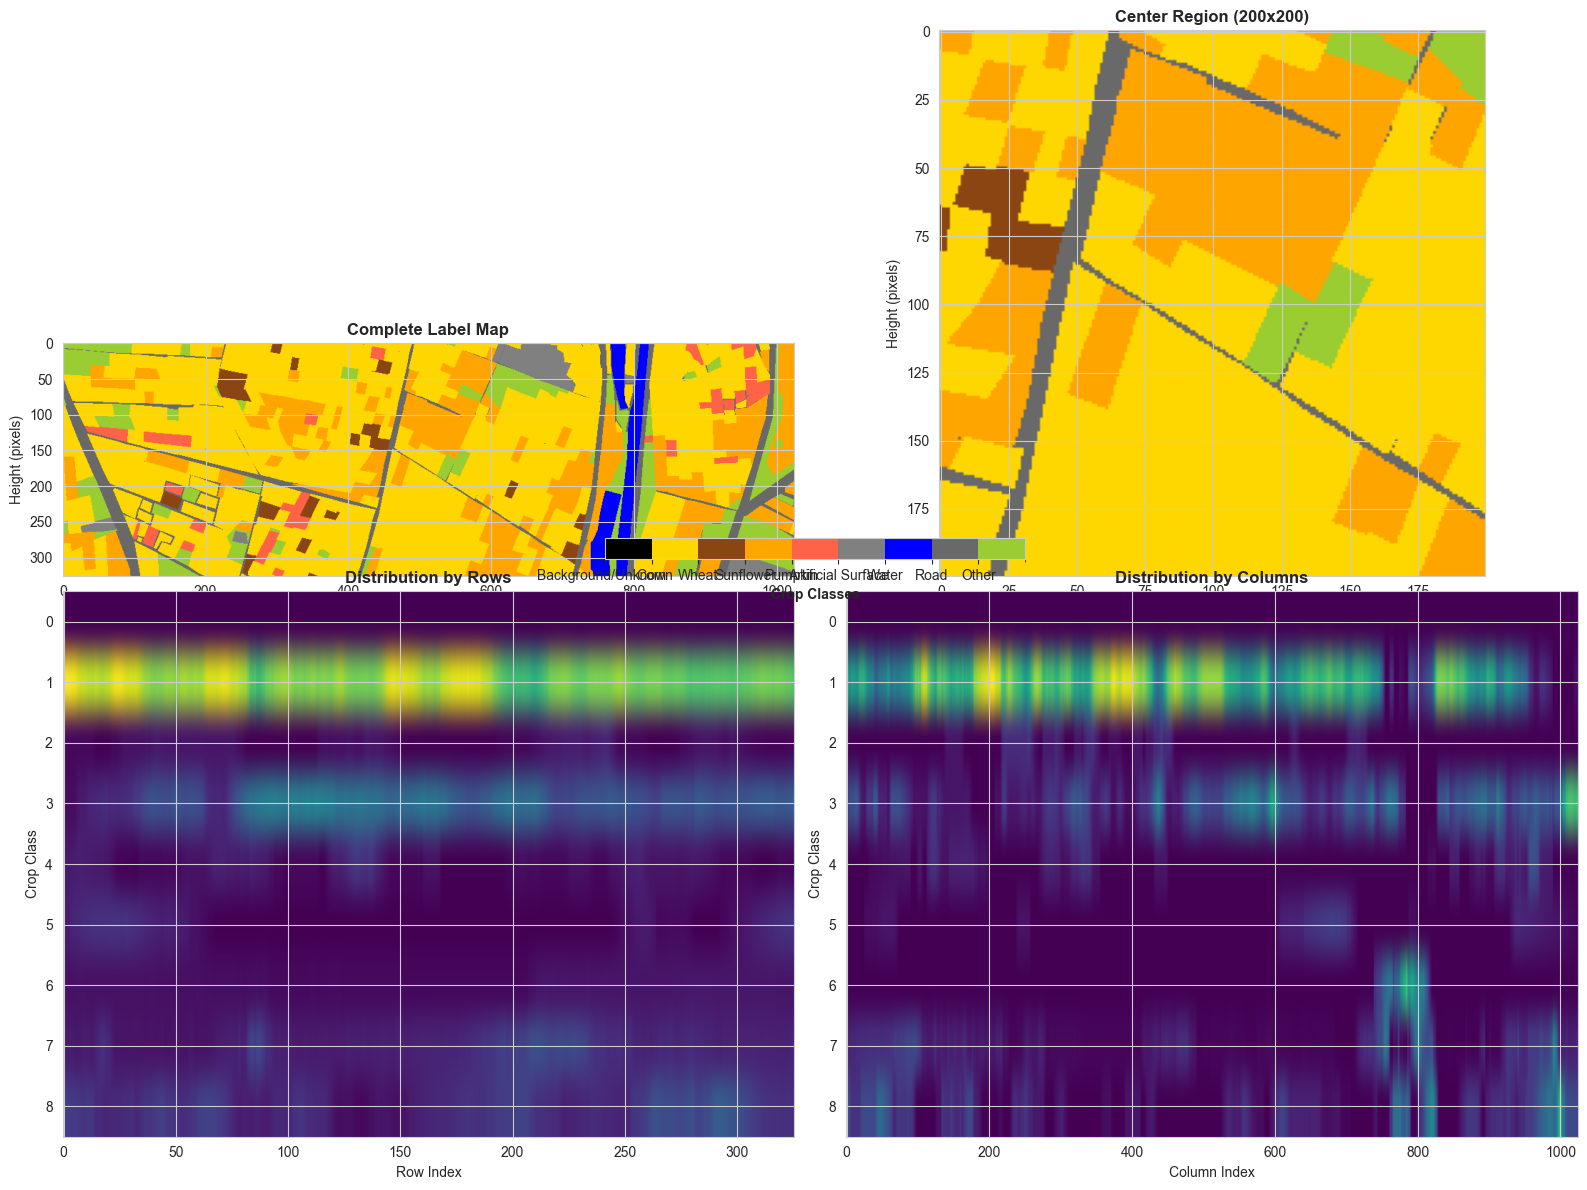

In [7]:
# 空间分布可视化
print("生成空间分布图...")
visualizer.plot_spatial_distribution()
plt.show()

生成光谱分析图...


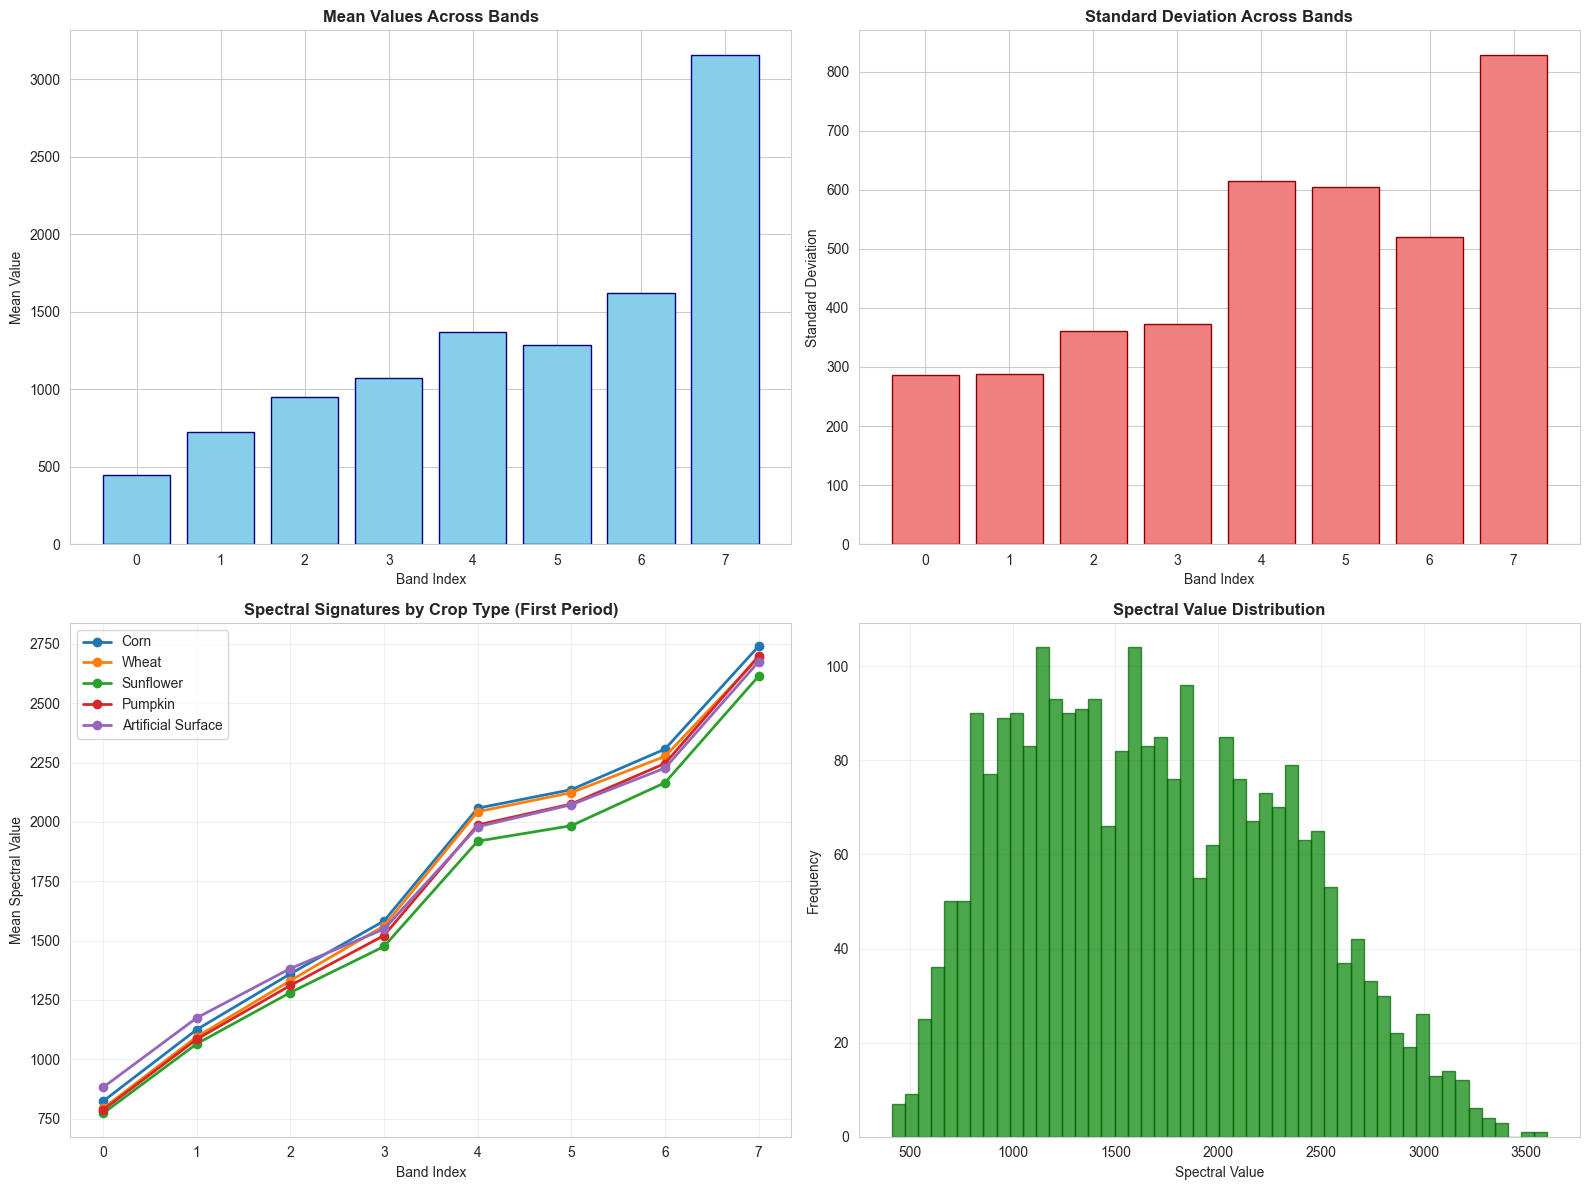

In [8]:
# 光谱特征分析
print("生成光谱分析图...")
visualizer.plot_spectral_analysis(sample_points=100)
plt.show()

In [ ]:
# 时序分析
print("生成时序分析图...")
visualizer.plot_temporal_analysis(sample_pixels=50)
plt.show()

## 5. 数据预处理演示

演示如何使用dimension_checker模块处理维度不匹配的数据。

In [ ]:
# 数据对齐演示（如果需要）
print("=" * 60)
print("数据对齐演示")
print("=" * 60)

if not dimension_result['match']:
    print("检测到维度不匹配，演示对齐处理...")
    
    # 模拟不同的对齐方法
    methods = ['crop_y_to_x', 'pad_x_to_y', 'crop_to_common']
    
    for method in methods:
        print(f"\n使用方法: {method}")
        try:
            x_aligned, y_aligned = align_data_dimensions(x_data, y_data, method=method)
            print(f"  对齐后 X 形状: {x_aligned.shape}")
            print(f"  对齐后 Y 形状: {y_aligned.shape}")
        except Exception as e:
            print(f"  方法 {method} 失败: {e}")
else:
    print("数据维度已匹配，无需对齐处理。")
    print(f"当前数据形状:")
    print(f"  X: {x_data.shape}")
    print(f"  Y: {y_data.shape}")

## 6. 交互式像素探索

随机选择一些像素点进行详细分析。

In [ ]:
# 交互式像素探索
print("=" * 60)
print("交互式像素探索")
print("=" * 60)

# 随机选择几个像素进行分析
for i in range(3):
    print(f"\n--- 像素点 {i+1} ---")
    visualizer.interactive_pixel_explorer()
    print()

## 7. 数据预处理函数工具箱

提供一些常用的数据预处理函数。

In [ ]:
# 数据预处理工具函数
def normalize_data(data, method='minmax'):
    """数据归一化"""
    if method == 'minmax':
        return (data - data.min()) / (data.max() - data.min())
    elif method == 'zscore':
        return (data - data.mean()) / data.std()
    else:
        raise ValueError(f"Unknown normalization method: {method}")

def calculate_ndvi(nir_band, red_band):
    """计算NDVI指数"""
    return (nir_band - red_band) / (nir_band + red_band + 1e-8)

def crop_center(data, output_size):
    """从中心裁剪数据到指定尺寸"""
    h, w = data.shape[:2]
    new_h, new_w = output_size
    
    start_h = (h - new_h) // 2
    start_w = (w - new_w) // 2
    
    if len(data.shape) == 4:
        return data[start_h:start_h+new_h, start_w:start_w+new_w, :, :]
    else:
        return data[start_h:start_h+new_h, start_w:start_w+new_w]

print("数据预处理工具函数定义完成！")
print("可用函数:")
print("- normalize_data(): 数据归一化")
print("- calculate_ndvi(): 计算NDVI指数")
print("- crop_center(): 中心裁剪")

## 总结

本notebook提供了完整的数据分析和预处理流程：

1. **维度检查**: 自动检查X和Y数据的维度匹配情况
2. **数据概览**: 全面的数据统计和质量分析
3. **可视化分析**: 多维度的数据可视化
4. **预处理工具**: 维度对齐和常用预处理函数
5. **交互式探索**: 像素级别的详细分析

这些工具可以帮助你更好地理解数据特征，为后续的模型训练做好准备。